In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time
import re
from sklearn.metrics import silhouette_samples
from tslearn.metrics import cdist_soft_dtw_normalized, cdist_dtw
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

/home/kuba/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
np.set_printoptions(suppress=True, precision=5)

In [3]:
KatalogPickli="Pickle"
outDir="../src/OutDir"

In [4]:
with open(os.path.join(KatalogPickli, "Ecola-wygladzone-ustandaryzowane.pickle"), "rb") as plik:
    szeregi=pickle.load(plik)

In [5]:
with open(os.path.join(outDir, "odl-Ecola-wygladzone-ustandaryzowane.pickle1627817822.0182662dtw.pickle"), "rb") as plik:
    odlDtw=pickle.load(plik)

# Softdtw

### Wykres silhouette

In [8]:
reExpr=re.compile(r".*([1-9])\.0\.pickle")
reExprOdl=re.compile(r".*odl.*")

In [9]:
listaPasujacych={}
listaOdl={}
for plik in os.listdir("../src/OutDir"):
    dopasowanie=reExpr.match(plik)
    if dopasowanie is not None:
        if reExprOdl.match(plik) is None:
            gamma=dopasowanie.groups()[0]
            gamma=int(gamma)
            if gamma not in listaPasujacych:
                listaPasujacych[gamma]=[]
            listaPasujacych[gamma].append(plik)
        else:
            gamma=dopasowanie.groups()[0]
            gamma=int(gamma)
            listaOdl[gamma]=plik

In [30]:
listaSilhouetteScore={}
for gamma in range(2,9):
    listaSilhouetteScore[gamma]=[None for i in range(6)]
    with open(os.path.join(outDir, listaOdl[gamma]), "rb") as plik:
        odl=pickle.load(plik)
    for plik in listaPasujacych[gamma]:
        with open(os.path.join("../src/OutDir/",plik), "rb") as file:
            model=pickle.load(file)
        etykiety=model.predict(szeregi)
        ocena=silhouette_score(odl, etykiety, metric="precomputed")
        listaSilhouetteScore[gamma][model.n_clusters-2]=ocena

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dime

In [31]:
listaSilhouetteScore

{2: [0.25824816262703193,
  0.23402697054027666,
  0.2042691550081344,
  0.19134659387213207,
  0.1888711591973867,
  0.17971228246435925],
 3: [0.19829302881690478,
  0.22650796222537503,
  0.2095548003947836,
  0.2062708842595507,
  0.1825104461850626,
  0.19362760878520055],
 4: [0.21119283788653076,
  0.2259469232284517,
  0.2179103894986978,
  0.19659803983100677,
  0.19912249065447393,
  0.19028546868987503],
 5: [0.25754072679396206,
  0.23934445349956773,
  0.21414788967710624,
  0.2086089975813493,
  0.19674202486352763,
  0.19582057778373074],
 6: [0.22954690595907679,
  0.2433084702769951,
  0.21284437629431222,
  0.21560277616382326,
  0.1943400515351611,
  0.20364733007085392],
 7: [0.23489448545180694,
  0.24326287835774044,
  0.22548802101522625,
  0.2144593296146226,
  0.21193953364452248,
  0.20374681907596223],
 8: [0.2464231020438352,
  0.24664766400619204,
  0.22962691159529222,
  0.21606829694136176,
  0.2058595878626948,
  0.19811005133120313]}

In [6]:
listaSilhouetteScore={2: [0.25824816262703193,
  0.23402697054027666,
  0.2042691550081344,
  0.19134659387213207,
  0.1888711591973867,
  0.17971228246435925],
 3: [0.19829302881690478,
  0.22650796222537503,
  0.2095548003947836,
  0.2062708842595507,
  0.1825104461850626,
  0.19362760878520055],
 4: [0.21119283788653076,
  0.2259469232284517,
  0.2179103894986978,
  0.19659803983100677,
  0.19912249065447393,
  0.19028546868987503],
 5: [0.25754072679396206,
  0.23934445349956773,
  0.21414788967710624,
  0.2086089975813493,
  0.19674202486352763,
  0.19582057778373074],
 6: [0.22954690595907679,
  0.2433084702769951,
  0.21284437629431222,
  0.21560277616382326,
  0.1943400515351611,
  0.20364733007085392],
 7: [0.23489448545180694,
  0.24326287835774044,
  0.22548802101522625,
  0.2144593296146226,
  0.21193953364452248,
  0.20374681907596223],
 8: [0.2464231020438352,
  0.24664766400619204,
  0.22962691159529222,
  0.21606829694136176,
  0.2058595878626948,
  0.19811005133120313]}

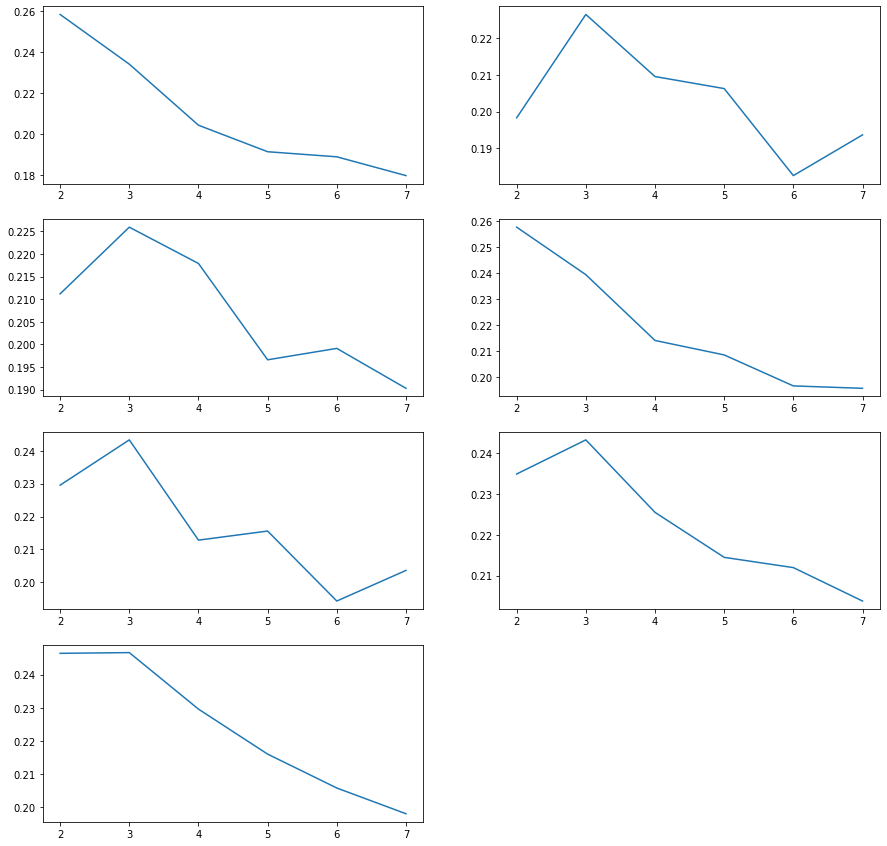

In [7]:
plt.gcf().set_size_inches(15,15)
for gamma in range(2,9):
    plt.subplot(4,2,gamma-1)
    plt.plot(range(2,8), listaSilhouetteScore[gamma])

In [10]:
listaSilhouetteScoreKmeans={}
for gamma in range(2,9):
    listaSilhouetteScoreKmeans[gamma]=[None for i in range(6)]
    with open(os.path.join(outDir, listaOdl[gamma]), "rb") as plik:
        odl=pickle.load(plik)
    for k in range(2,8):
        model=KMeans(k)
        etykiety=model.fit_predict(szeregi)
        ocena=silhouette_score(odl, etykiety, metric="precomputed")
        listaSilhouetteScoreKmeans[gamma][model.n_clusters-2]=ocena

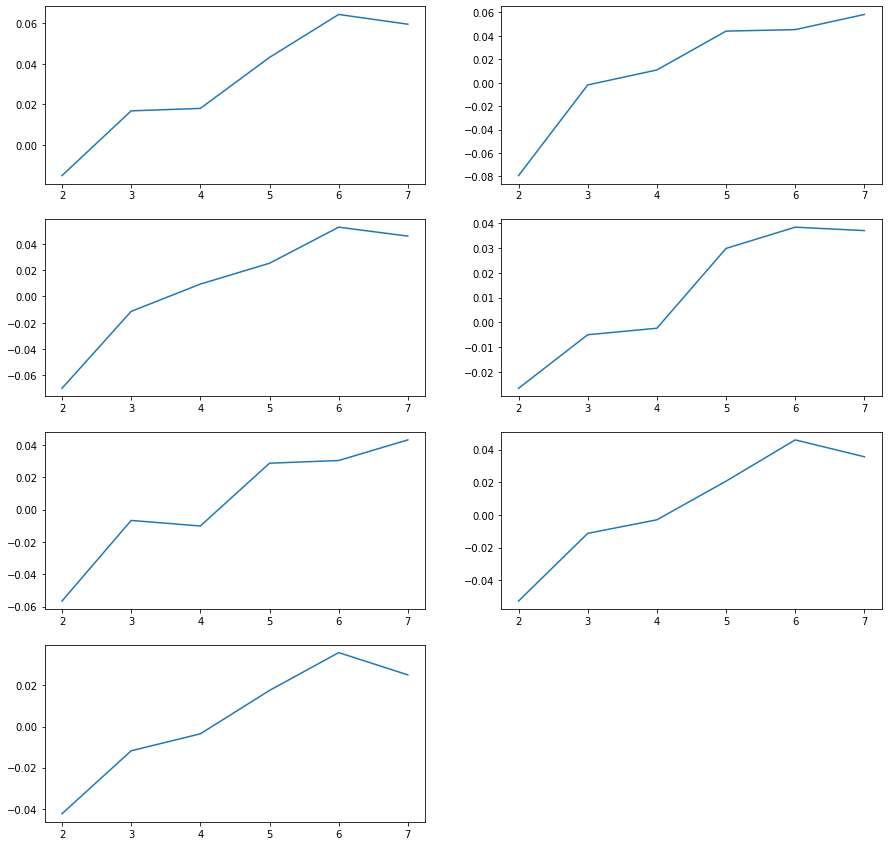

In [11]:
plt.gcf().set_size_inches(15,15)
for gamma in range(2,9):
    plt.subplot(4,2,gamma-1)
    plt.plot(range(2,8), np.array(listaSilhouetteScore[gamma])-np.array(listaSilhouetteScoreKmeans[gamma]))

In [13]:
roznice=[]
for gamma in range(2,9):
    roznice.append(listaSilhouetteScore[gamma][-2]-listaSilhouetteScoreKmeans[gamma][-2])

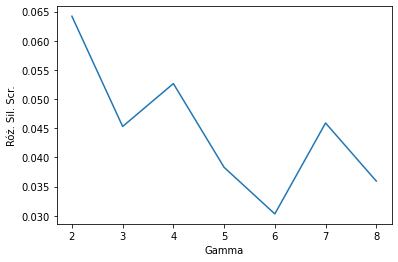

In [18]:
plt.plot(range(2,9), roznice)
plt.xlabel("Gamma")
plt.ylabel("Róż. Sil. Scr.")
plt.show()